# Import and Install Dependencies

In [49]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [50]:
# Holistic detetction API (Hands, Face and Pose)

mp_holistic = mp.solutions.holistic

# Drawing Utilities for keypoint and landmark detection

mp_drawings = mp.solutions.drawing_utils

In [15]:
def mediapipe_detection(image, model):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image.flags.writeable = False

    results = model.process(image)

    image.flags.writeable = True

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    return image, results

In [16]:
def draw_landmarks(image, results):

    # Face Landmarks

    mp_drawings.draw_landmarks(image, 

                               results.face_landmarks, 

                               mp_holistic.FACEMESH_TESSELATION, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 255, 101), thickness=1, circle_radius=1))

    # Pose Landmarks

    mp_drawings.draw_landmarks(image, 

                               results.pose_landmarks, 

                               mp_holistic.POSE_CONNECTIONS, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 255, 101), thickness=1, circle_radius=1))

    # Left Hand Landmarks

    mp_drawings.draw_landmarks(image, 

                               results.left_hand_landmarks, 

                               mp_holistic.HAND_CONNECTIONS, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 255, 101), thickness=1, circle_radius=1))

    # Right Hand 

    mp_drawings.draw_landmarks(image, 

                               results.right_hand_landmarks, 

                               mp_holistic.HAND_CONNECTIONS, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 255, 101), thickness=1, circle_radius=1))

In [17]:
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:

    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)

        draw_landmarks(image, results)

        

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):

            break

cap.release()

cv2.destroyAllWindows()

In [19]:
draw_landmarks(frame, results)

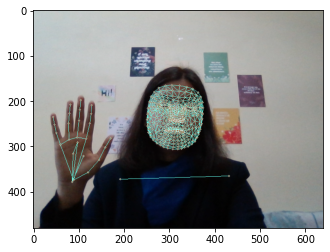

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [21]:
len(results.right_hand_landmarks.landmark)

21

In [22]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [23]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [24]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.49308124,  0.48694369, -0.82234895, ...,  0.07018319,
        0.48987353, -0.04031748])

In [28]:
np.save('0', result_test)

In [29]:
np.load('0.npy')

array([ 0.49308124,  0.48694369, -0.82234895, ...,  0.07018319,
        0.48987353, -0.04031748])

# Setup Folders for Collection

In [30]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.dirname('D:/PROJECTS/ASL Recognition Using Deep Learning/DataSet/') 

# Actions that we try to detect
actions = np.array(['Hello', 'Thank You', 'I Love You','Are You','Good','Sorry','Goodbye','How','No','I am'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [31]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [32]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:

    for action in actions:

        for sequence in range(no_sequences):

            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                # print(results)

                draw_landmarks(image, results)

                if frame_num == 0: 

                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 

                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)

                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 

                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)

                    cv2.waitKey(1000)

                else: 

                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 

                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)

                

                keypoints = extract_keypoints(results)

                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):

                    break 

    cap.release()
    cv2.destroyAllWindows()   

# Preprocess Data and Create Labels and Features

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [34]:
label_map = {label:num for num, label in enumerate(actions)}

In [35]:
label_map

{'Hello': 0,
 'Thank You': 1,
 'I Love You': 2,
 'Are You': 3,
 'Good': 4,
 'Sorry': 5,
 'Goodbye': 6,
 'How': 7,
 'No': 8,
 'I am': 9}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
np.array(sequences).shape

(300, 30, 1662)

In [38]:
np.array(labels).shape

(300,)

In [39]:
X = np.array(sequences)

In [40]:
X.shape

(300, 30, 1662)

In [41]:
y = to_categorical(labels).astype(int)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [43]:
y_test.shape

(15, 10)

# Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='sigmoid', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='sigmoid'))
model.add(LSTM(64, return_sequences=False, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=750, callbacks=[tb_callback])

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 596,906
Trainable params: 596,906
Non-trai

#  Make Predictions

In [129]:
res = model.predict(X_test)

1/1 [==============================] - 0s 111ms/step


In [130]:
actions[np.argmax(res[4])]

'Good'

In [131]:
actions[np.argmax(y_test[4])]

'Good'

# Save Weights

In [132]:
# model.save('action.h5')

In [133]:
# model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [29]:
import tensorflow as tf
model = tf.keras.models.load_model('action.h5')

In [30]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [31]:
yhat = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [32]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [33]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[14,  0],
        [ 0,  1]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[13,  0],
        [ 0,  2]],

       [[11,  0],
        [ 0,  4]],

       [[11,  0],
        [ 0,  4]],

       [[14,  0],
        [ 0,  1]]], dtype=int64)

In [138]:
accuracy_score(ytrue, yhat)

0.8666666666666667

# Test in Real Time

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
# Holistic detetction API (Hands, Face and Pose)
mp_holistic = mp.solutions.holistic

# Drawing Utilities for keypoint and landmark detection
mp_drawings = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image.flags.writeable = False

    results = model.process(image)

    image.flags.writeable = True

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    return image, results

In [5]:
def draw_landmarks(image, results):

    # Face Landmarks

    mp_drawings.draw_landmarks(image, 

                               results.face_landmarks, 

                               mp_holistic.FACEMESH_TESSELATION, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))

    # Pose Landmarks

    mp_drawings.draw_landmarks(image, 

                               results.pose_landmarks, 

                               mp_holistic.POSE_CONNECTIONS, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))

    # Left Hand Landmarks

    mp_drawings.draw_landmarks(image, 

                               results.left_hand_landmarks, 

                               mp_holistic.HAND_CONNECTIONS, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))

    # Right Hand 

    mp_drawings.draw_landmarks(image, 

                               results.right_hand_landmarks, 

                               mp_holistic.HAND_CONNECTIONS, 

                               mp_drawings.DrawingSpec(color=(6, 70, 99), thickness=1, circle_radius=1), 

                               mp_drawings.DrawingSpec(color=(236, 179, 101), thickness=1, circle_radius=1))

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [7]:
model.load_weights('action.h5')
import tensorflow as tf
model = tf.keras.models.load_model('action.h5')

In [8]:
from scipy import stats

In [9]:
colors = [(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245),(245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.50, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 1: 
                sentence = sentence[-1:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (10,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()